In [16]:
from river.datasets import Insects
from river.datasets import synth
from clustream import CluStream
from river import drift
import math
import numpy as np
import matplotlib.pyplot as plt
from river.utils import dict2numpy
from scipy.spatial import distance_matrix
from time import time

In [10]:
dataset = Insects('abrupt_balanced')


In [11]:
learner = CluStream(n_macro_clusters=6,max_micro_clusters=60,time_window=300)
test = drift.PageHinkley(100,delta=0.05,threshold=30,alpha= 0.9999,mode='both')



In [12]:
def get_mean_dist(learner):
    ## Calcule la moyenne des max distances entres les centres des micro clusters
    mc_centers = [dict2numpy(x) for x in dict2numpy(learner.get_micro_clusters())]
    max_dist = np.max(distance_matrix(mc_centers,mc_centers,2),axis=1)
    return np.mean(max_dist)

In [13]:
file = open("results.txt",mode="w")
loop = 0
last_dist = 0
dist = 0
for x,y in dataset:
    if loop <= 200 :
        learner.learn_one(x)
        
    else :
        if loop == 1000 :
            print("Done training")
            learner.offline_cluster()

        if loop == 10000:
            break
        
        learner.learn_one(x)
        dist = get_mean_dist(learner)
        file.write(str(dist) + ' ')
        test.update(dist )
        
        if test.drift_detected : 
            print(f"Drift Detected at instance: {loop}")
        
            
        
    loop += 1
    last_dist = dist

file.close()

Done training
Drift Detected at instance: 1151
Drift Detected at instance: 1525
Drift Detected at instance: 2918
Drift Detected at instance: 3274
Drift Detected at instance: 3537
Drift Detected at instance: 4208
Drift Detected at instance: 6232
Drift Detected at instance: 6536
Drift Detected at instance: 6852
Drift Detected at instance: 7215
Drift Detected at instance: 7682
Drift Detected at instance: 8420
Drift Detected at instance: 8703
Drift Detected at instance: 9537
Drift Detected at instance: 9857


In [14]:
arr = np.loadtxt('results.txt')

In [19]:
x = np.arange(0,arr.size)

Text(0, 0.5, 'distance moyenne')

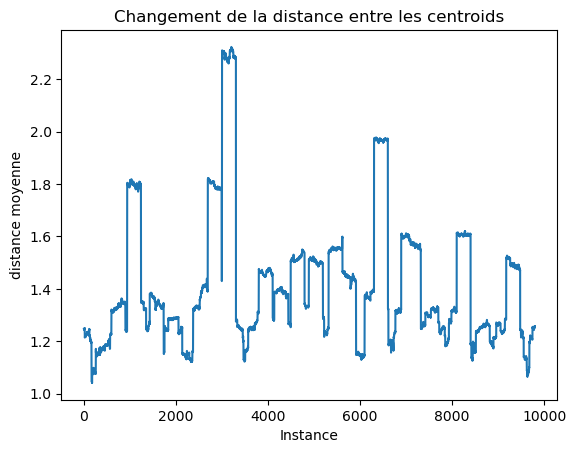

In [22]:
plt.plot(x,arr)
plt.title("Changement de la distance entre les centroids")
plt.xlabel("Instance")
plt.ylabel("distance moyenne")